In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

import shapely.geometry as sg
import shapely
import descartes

In [2]:
def polar(r: float, phi=None, deg=None):
    if deg is not None:
        phi = 2 * np.pi * (deg / 360)
    return np.array([r * np.cos(phi), r * np.sin(phi)])

In [3]:
def lambda_line(p1, p2, l1=0.0, l2=1.0):
    p1 = np.array(p1)
    p2 = np.array(p2)
    
    return np.array([
        p1 + l1 * (p2 - p1),
        p1 + l2 * (p2 - p1),
    ])
    

/nfs/homedirs/fuchsgru/miniconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


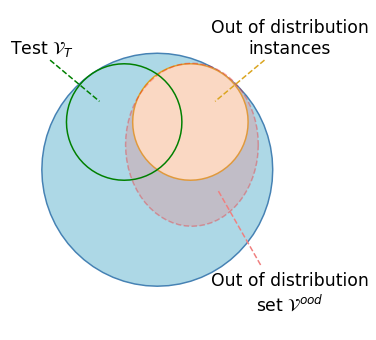

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.3, 1.6)
ax.set_ylim(-1.4, 1.4)

pos_all = np.array([0, 0])
shape_all = sg.Point(pos_all).buffer(1.0)

pos_ood = polar(0.5, deg=55)
shape_ood = sg.Point(pos_ood).buffer(.5)

pos_test = polar(0.5, deg=125)
shape_test = sg.Point(pos_test).buffer(.5)

pos_oodset = np.array((polar(0.75, deg=55) - [0.13, 0.4]))
shape_oodset = sg.Point(pos_oodset).buffer(.5)
shape_oodset = shapely.affinity.scale(shape_oodset, 1.15, 1.4)

ax.add_patch(descartes.PolygonPatch(shape_all, fc='lightblue', ec='steelblue', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_ood, fc='lightyellow', ec='goldenrod', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_oodset, fc='lightcoral', ec='red', lw=1.5, alpha=.3, ls='--'))
ax.add_patch(descartes.PolygonPatch(shape_test, fc=np.array([0, 0, 0, 0]), ec='green', lw=1.5))

ax.text(-1.0, 1, 'Test $\mathcal{V}_T$', fontsize='xx-large', ha='center')
ax.text(1.15, 1, 'Out of distribution\ninstances', fontsize='xx-large', ha='center')
ax.text(1.15, -1.2, 'Out of distribution\nset $\\mathcal{V}^{ood}$', fontsize='xx-large', ha='center')

line_test = lambda_line((-1, 1), pos_test, l1 = 0.1, l2 = 0.7,)
ax.plot(line_test[:, 0], line_test[:, 1], c='green', ls='--')

line_test = lambda_line((1, 1), pos_ood, l1 = 0.1, l2 = 0.7,)
ax.plot(line_test[:, 0], line_test[:, 1], c='goldenrod', ls='--')

line_test = lambda_line((1, -1), pos_oodset, l1 = 0.15, l2 = 0.68,)
ax.plot(line_test[:, 0], line_test[:, 1], c='lightcoral', ls='--')

ax.axis('off')

fig.savefig('split.pdf')#, bbox_inches='tight')


/nfs/homedirs/fuchsgru/miniconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


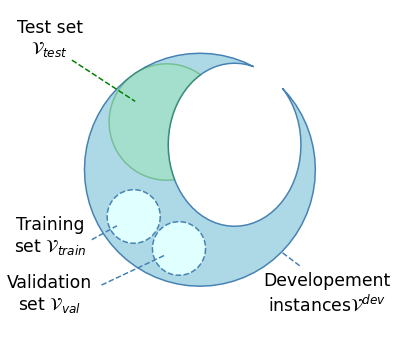

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.3, 1.6)
ax.set_ylim(-1.4, 1.4)

pos_all = np.array([0, 0])
shape_all = sg.Point(pos_all).buffer(1.0)

pos_ood = polar(0.5, deg=55)
shape_ood = sg.Point(pos_ood).buffer(.5)

pos_test = polar(0.5, deg=125)
shape_test = sg.Point(pos_test).buffer(.5)

pos_oodset = np.array((polar(0.75, deg=55) - [0.13, 0.4]))
shape_oodset = sg.Point(pos_oodset).buffer(.5)
shape_oodset = shapely.affinity.scale(shape_oodset, 1.15, 1.4)

pos_train = polar(0.7, deg=215)
shape_train = sg.Point(pos_train).buffer(.23)

pos_val = polar(0.7, deg=255)
shape_val = sg.Point(pos_val).buffer(.23)

shape_all = shape_all.difference(shape_oodset)
shape_test = shape_test.difference(shape_oodset)


ax.add_patch(descartes.PolygonPatch(shape_all, fc='lightblue', ec='steelblue', lw=1.5))
#ax.add_patch(descartes.PolygonPatch(shape_ood, fc='lightyellow', ec='goldenrod', lw=1.5))
#ax.add_patch(descartes.PolygonPatch(shape_oodset, fc='lightcoral', ec='red', lw=1.5, alpha=.3, ls='--'))
ax.add_patch(descartes.PolygonPatch(shape_test, fc='lightgreen', alpha=.3, ec='green', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_train, fc='lightcyan', ec='steelblue', lw=1.5, ls='--'))
ax.add_patch(descartes.PolygonPatch(shape_val, fc='lightcyan', ec='steelblue', lw=1.5, ls='--'))

ax.text(-1.3, 1.0, 'Test set\n$\mathcal{V}_{test}$', fontsize='xx-large', ha='center')
ax.text(1.1, -1.2, 'Developement\ninstances$\\mathcal{V}^{dev}$', fontsize='xx-large', ha='center')
ax.text(-1.3, -1.2, 'Validation\nset $\mathcal{V}_{val}$', fontsize='xx-large', ha='center')
ax.text(-1.3, -0.7, 'Training\nset $\mathcal{V}_{train}$', fontsize='xx-large', ha='center')

line_test = lambda_line((-1.2, 1.0), polar(0.5, deg=125), l1 = 0.1, l2 = 0.7,)
ax.plot(line_test[:, 0], line_test[:, 1], c='green', ls='--')


line_test = lambda_line((1.1, -1), polar(1.0, deg=315), l1 = 0.6, l2 = 1.0,)
ax.plot(line_test[:, 0], line_test[:, 1], c='steelblue', ls='--')


line_test = lambda_line((-1.3, -1.2), polar(0.7, deg=255), l1 = 0.4, l2 = 0.9,)
ax.plot(line_test[:, 0], line_test[:, 1], c='steelblue', ls='--')

line_test = lambda_line((-1.3, -0.8), polar(0.7, deg=215), l1 = 0.5, l2 = 0.8,)
ax.plot(line_test[:, 0], line_test[:, 1], c='steelblue', ls='--')

ax.axis('off')


fig.savefig('split_dev.pdf') #, bbox_inches='tight')


/nfs/homedirs/fuchsgru/miniconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


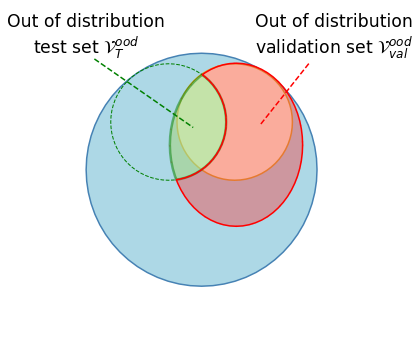

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.3, 1.6)
ax.set_ylim(-1.4, 1.4)

pos_all = np.array([0, 0])
shape_all = sg.Point(pos_all).buffer(1.0)

pos_ood = polar(0.5, deg=55)
shape_ood = sg.Point(pos_ood).buffer(.5)

pos_test = polar(0.5, deg=125)
shape_test = sg.Point(pos_test).buffer(.5)

pos_oodset = np.array((polar(0.75, deg=55) - [0.13, 0.4]))
shape_oodset = sg.Point(pos_oodset).buffer(.5)
shape_oodset = shapely.affinity.scale(shape_oodset, 1.15, 1.4)

shape_testdev = shape_test.intersection(shape_oodset)
shape_valood = shape_oodset.difference(shape_testdev)

ax.add_patch(descartes.PolygonPatch(shape_all, fc='lightblue', ec='steelblue', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_ood, fc='lightyellow', ec='goldenrod', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_oodset, fc='lightcoral', ec='red', lw=1.5, alpha=.3, ls=(0, (1, 10))))
ax.add_patch(descartes.PolygonPatch(shape_test, fc=np.array([0, 0, 0, 0]), ec='green', lw=1, ls='--'))

ax.add_patch(descartes.PolygonPatch(shape_testdev, fc='lightgreen', ec='green', alpha=.5, lw=2.5))
ax.add_patch(descartes.PolygonPatch(shape_valood, fc='red', ec='lightcoral', alpha=.2, lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_valood, fc=[0, 0, 0, 0], ec='red', lw=1.5))

ax.text(-1.0, 1, 'Out of distribution\ntest set $\mathcal{V}_T^{ood}$', fontsize='xx-large', ha='center')
ax.text(1.15, 1, 'Out of distribution\nvalidation set $\mathcal{V}_{val}^{ood}$', fontsize='xx-large', ha='center')

line_test = lambda_line((-1, 1), pos_test - [0, -0.1] , l1 = 0.1, l2 = 1.3,)
ax.plot(line_test[:, 0], line_test[:, 1], c='green', ls='--')

line_test = lambda_line((1, 1), pos_ood - [0, 0.3], l1 = 0.1, l2 = 0.7,)
ax.plot(line_test[:, 0], line_test[:, 1], c='red', ls='--')


ax.axis('off')


fig.savefig('split_ood.pdf')#, bbox_inches='tight')


# All in one plot

/nfs/homedirs/fuchsgru/miniconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/nfs/homedirs/fuchsgru/miniconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/nfs/homedirs/fuchsgru/miniconda3/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


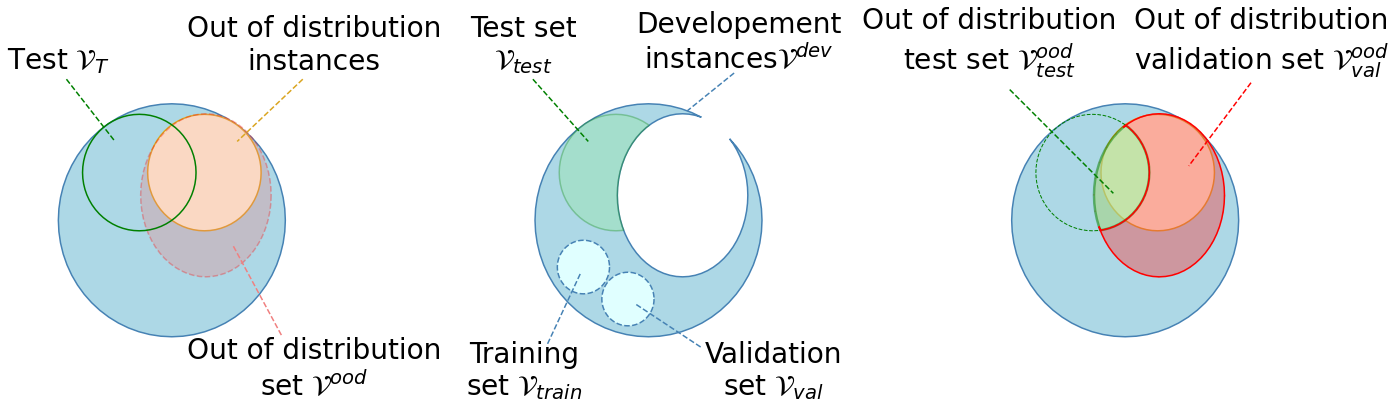

In [13]:
fig, ax = plt.subplots(figsize=(24, 6))
ax.set_xlim(-1.3, 10.5)
ax.set_ylim(-1.4, 1.4)

spacing = 4.2

# --- LEFT ---


pos_all = np.array([0, 0])
shape_all = sg.Point(pos_all).buffer(1.0)

pos_ood = polar(0.5, deg=55)
shape_ood = sg.Point(pos_ood).buffer(.5)

pos_test = polar(0.5, deg=125)
shape_test = sg.Point(pos_test).buffer(.5)

pos_oodset = np.array((polar(0.75, deg=55) - [0.13, 0.4]))
shape_oodset = sg.Point(pos_oodset).buffer(.5)
shape_oodset = shapely.affinity.scale(shape_oodset, 1.15, 1.4)

ax.add_patch(descartes.PolygonPatch(shape_all, fc='lightblue', ec='steelblue', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_ood, fc='lightyellow', ec='goldenrod', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_oodset, fc='lightcoral', ec='red', lw=1.5, alpha=.3, ls='--'))
ax.add_patch(descartes.PolygonPatch(shape_test, fc=np.array([0, 0, 0, 0]), ec='green', lw=1.5))

pos_test_text = np.array([-1.0, 1.3])
pos_ood_text = np.array([1.25, 1.3])
pos_ood_set_text = np.array([1.25, -1.5])

ax.text(*pos_test_text, 'Test $\mathcal{V}_T$', fontsize=28, ha='center')
ax.text(*pos_ood_text, 'Out of distribution\ninstances', fontsize=28, ha='center')
ax.text(*pos_ood_set_text, 'Out of distribution\nset $\\mathcal{V}^{ood}$', fontsize=28, ha='center')

line_test = lambda_line(pos_test_text, pos_test, l1 = 0.1, l2 = 0.7,)
ax.plot(line_test[:, 0], line_test[:, 1], c='green', ls='--')

line_test = lambda_line(pos_ood_text, pos_ood, l1 = 0.1, l2 = 0.7,)
ax.plot(line_test[:, 0], line_test[:, 1], c='goldenrod', ls='--')

line_test = lambda_line(pos_ood_set_text, pos_oodset, l1 = 0.3, l2 = 0.75,)
ax.plot(line_test[:, 0], line_test[:, 1], c='lightcoral', ls='--')

# ---- CENTER -----

off_center = [spacing, 0]

pos_all = np.array([0, 0]) + off_center
shape_all = sg.Point(pos_all).buffer(1.0)

pos_ood = polar(0.5, deg=55) + off_center
shape_ood = sg.Point(pos_ood).buffer(.5)

pos_test = polar(0.5, deg=125) + off_center
shape_test = sg.Point(pos_test).buffer(.5)

pos_oodset = np.array((polar(0.75, deg=55) - [0.13, 0.4])) + off_center
shape_oodset = sg.Point(pos_oodset).buffer(.5)
shape_oodset = shapely.affinity.scale(shape_oodset, 1.15, 1.4)

pos_train = polar(0.7, deg=215) + off_center
shape_train = sg.Point(pos_train).buffer(.23)

pos_val = polar(0.7, deg=255) + off_center
shape_val = sg.Point(pos_val).buffer(.23)

shape_all = shape_all.difference(shape_oodset)
shape_test = shape_test.difference(shape_oodset)


pos_test_text = np.array([-1.1, 1.3]) + off_center
pos_dev_text = np.array([0.8, 1.3]) + off_center
pos_val_text = np.array([1.1, -1.5]) + off_center
pos_train_text = np.array([-1.1, -1.5]) + off_center

ax.add_patch(descartes.PolygonPatch(shape_all, fc='lightblue', ec='steelblue', lw=1.5))
#ax.add_patch(descartes.PolygonPatch(shape_ood, fc='lightyellow', ec='goldenrod', lw=1.5))
#ax.add_patch(descartes.PolygonPatch(shape_oodset, fc='lightcoral', ec='red', lw=1.5, alpha=.3, ls='--'))
ax.add_patch(descartes.PolygonPatch(shape_test, fc='lightgreen', alpha=.3, ec='green', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_train, fc='lightcyan', ec='steelblue', lw=1.5, ls='--'))
ax.add_patch(descartes.PolygonPatch(shape_val, fc='lightcyan', ec='steelblue', lw=1.5, ls='--'))

ax.text(*pos_test_text, 'Test set\n$\mathcal{V}_{test}$', fontsize=28, ha='center')
ax.text(*pos_dev_text, 'Developement\ninstances$\\mathcal{V}^{dev}$', fontsize=28, ha='center')
ax.text(*pos_val_text, 'Validation\nset $\mathcal{V}_{val}$', fontsize=28, ha='center')
ax.text(*pos_train_text, 'Training\nset $\mathcal{V}_{train}$', fontsize=28, ha='center')

line_test = lambda_line(pos_test_text, polar(0.5, deg=125) + off_center, l1 = 0.1, l2 = 0.7,)
ax.plot(line_test[:, 0], line_test[:, 1], c='green', ls='--')


line_test = lambda_line(pos_dev_text, polar(1.0, deg=70) + off_center, l1 = 0.1, l2 = 1.0,)
ax.plot(line_test[:, 0], line_test[:, 1], c='steelblue', ls='--')


line_test = lambda_line(pos_val_text, polar(0.7, deg=255) + off_center, l1 = 0.5, l2 = 0.95,)
ax.plot(line_test[:, 0], line_test[:, 1], c='steelblue', ls='--')

line_test = lambda_line(pos_train_text, polar(0.7, deg=215) + off_center, l1 = 0.4, l2 = 0.95,)
ax.plot(line_test[:, 0], line_test[:, 1], c='steelblue', ls='--')

# --- RIGHT ---

off_right = [2 * spacing, 0]

pos_all = np.array([0, 0]) + off_right
shape_all = sg.Point(pos_all).buffer(1.0)

pos_ood = polar(0.5, deg=55) + off_right
shape_ood = sg.Point(pos_ood).buffer(.5)

pos_test = polar(0.5, deg=125) + off_right
shape_test = sg.Point(pos_test).buffer(.5)

pos_oodset = np.array((polar(0.75, deg=55) - [0.13, 0.4])) + off_right
shape_oodset = sg.Point(pos_oodset).buffer(.5)
shape_oodset = shapely.affinity.scale(shape_oodset, 1.15, 1.4)

shape_testdev = shape_test.intersection(shape_oodset)
shape_valood = shape_oodset.difference(shape_testdev)

ax.add_patch(descartes.PolygonPatch(shape_all, fc='lightblue', ec='steelblue', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_ood, fc='lightyellow', ec='goldenrod', lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_oodset, fc='lightcoral', ec='red', lw=1.5, alpha=.3, ls=(0, (1, 10))))
ax.add_patch(descartes.PolygonPatch(shape_test, fc=np.array([0, 0, 0, 0]), ec='green', lw=1, ls='--'))

ax.add_patch(descartes.PolygonPatch(shape_testdev, fc='lightgreen', ec='green', alpha=.5, lw=2.5))
ax.add_patch(descartes.PolygonPatch(shape_valood, fc='red', ec='lightcoral', alpha=.2, lw=1.5))
ax.add_patch(descartes.PolygonPatch(shape_valood, fc=[0, 0, 0, 0], ec='red', lw=1.5))


pos_test_text = np.array([-1.2, 1.3]) + off_right
pos_ood_text = np.array([1.2, 1.3]) + off_right

ax.text(*pos_test_text, 'Out of distribution\ntest set $\mathcal{V}_{test}^{ood}$', fontsize=28, ha='center')
ax.text(*pos_ood_text, 'Out of distribution\nvalidation set $\mathcal{V}_{val}^{ood}$', fontsize=28, ha='center')

line_test = lambda_line(pos_test_text, pos_test , l1 = 0.2, l2 = 1.2,)
ax.plot(line_test[:, 0], line_test[:, 1], c='green', ls='--')

line_test = lambda_line(pos_ood_text, pos_ood - [0, 0.3], l1 = 0.1, l2 = 0.7,)
ax.plot(line_test[:, 0], line_test[:, 1], c='red', ls='--')


ax.axis('off')

fig.savefig('splitting_all.pdf', bbox_inches='tight')